In [1]:
#535230080_Georgia Sugisandhea
#Mengimport library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium

In [2]:
#Membaca data excel ISPU Jakarta.xlsx dan sheet 1, dan memasukkannya ke variable ispu
ispu = pd.read_excel("ISPU Jakarta.xlsx", sheet_name="Sheet1");

In [3]:
#Menampilkan 5 baris awal dari data ispu
ispu.head()

,Tanggal,PM10,PM25,SO2,CO,O3,NO2
0,2018-01-01,76.0,NaN,31.0,38.0,35.0,9.0
1,2018-01-02,23.0,NaN,31.0,24.0,39.0,14.0
2,2018-01-03,53.0,NaN,35.0,35.0,101.0,23.0
3,2018-01-04,53.0,NaN,49.0,34.0,57.0,15.0
4,2018-01-05,44.0,NaN,32.0,26.0,28.0,10.0


In [4]:
#Mencetak banyak baris yang NaN dari masing masing kolom pada ispu
ispu.isna().sum()/len(ispu)*100

Tanggal     0.000000
PM10        0.332226
PM25       59.911406
SO2         0.885936
CO          0.332226
O3          0.110742
NO2         0.276855
dtype: float64

In [5]:
#Menghapus kolom PM25 dari tabel ispu dan memasukkannya ke variable ispu2
ispu2 = ispu.drop(['PM25'], axis = 1)

#Menampilkan 5 baris pertama dari ispu2
ispu2.head()

,Tanggal,PM10,SO2,CO,O3,NO2
0,2018-01-01,76.0,31.0,38.0,35.0,9.0
1,2018-01-02,23.0,31.0,24.0,39.0,14.0
2,2018-01-03,53.0,35.0,35.0,101.0,23.0
3,2018-01-04,53.0,49.0,34.0,57.0,15.0
4,2018-01-05,44.0,32.0,26.0,28.0,10.0


In [6]:
#mengisi baris yang valuenya missing dari masing masing kolom, menggunakan metode ffill (forward fill) dan bfill (backward fill)
ispu2 = ispu2.ffill()
ispu2 = ispu2.bfill()
#Menampilkan jumlah baris yang valuenya missing dari masing masing kolom, yaitu semuanya 0.0 karena sudah diisi
ispu2.isna().sum()/len(ispu2)*100

Tanggal    0.0
PM10       0.0
SO2        0.0
CO         0.0
O3         0.0
NO2        0.0
dtype: float64

In [7]:
#Membuat kolom kolom baru pada ispu2, dimana adalah pemecahan dari kolom tanggal, menjadi tahun, bulan, dan hari
ispu2['Tahun'] = pd.DatetimeIndex(ispu2['Tanggal']).year
ispu2['Bulan'] = pd.DatetimeIndex(ispu2['Tanggal']).month
ispu2['Hari'] = ispu2['Tanggal'].dt.day_name()
#Menampilkan 5 baris pertama dari tabel ispu2 
ispu2.head()

,Tanggal,PM10,SO2,CO,O3,NO2,Tahun,Bulan,Hari
0,2018-01-01,76.0,31.0,38.0,35.0,9.0,2018,1,Monday
1,2018-01-02,23.0,31.0,24.0,39.0,14.0,2018,1,Tuesday
2,2018-01-03,53.0,35.0,35.0,101.0,23.0,2018,1,Wednesday
3,2018-01-04,53.0,49.0,34.0,57.0,15.0,2018,1,Thursday
4,2018-01-05,44.0,32.0,26.0,28.0,10.0,2018,1,Friday


In [8]:
#Meng-copy tabel ispu ke ke varoable ispu4 untuk menyimpan data ispu4
ispu4 = ispu
#Menghapus baris baris yang memiliki missing values
ispu4 = ispu.dropna()
#Membuat kolom kolom baru pada ispu4, dimana adalah pemecahan dari kolom tanggal, menjadi tahun, bulan, dan hari
ispu4['Tahun'] = pd.DatetimeIndex(ispu4['Tanggal']).year
ispu4['Bulan'] = pd.DatetimeIndex(ispu4['Tanggal']).month
ispu4['Hari'] = ispu4['Tanggal'].dt.day_name()
#Menampilkan 5 baris pertama dari ispu4
ispu4.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19880\540140320.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ispu4['Tahun'] = pd.DatetimeIndex(ispu4['Tanggal']).year
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19880\540140320.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ispu4['Bulan'] = pd.DatetimeIndex(ispu4['Tanggal']).month
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19880\540140320.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,Tanggal,PM10,PM25,SO2,CO,O3,NO2,Tahun,Bulan,Hari
1076,2021-01-01,38.0,53.0,29.0,6.0,31.0,13.0,2021,1,Friday
1077,2021-01-02,27.0,46.0,27.0,7.0,47.0,7.0,2021,1,Saturday
1078,2021-01-03,44.0,58.0,25.0,7.0,40.0,13.0,2021,1,Sunday
1079,2021-01-04,30.0,48.0,24.0,4.0,32.0,7.0,2021,1,Monday
1080,2021-01-05,38.0,53.0,24.0,6.0,31.0,9.0,2021,1,Tuesday


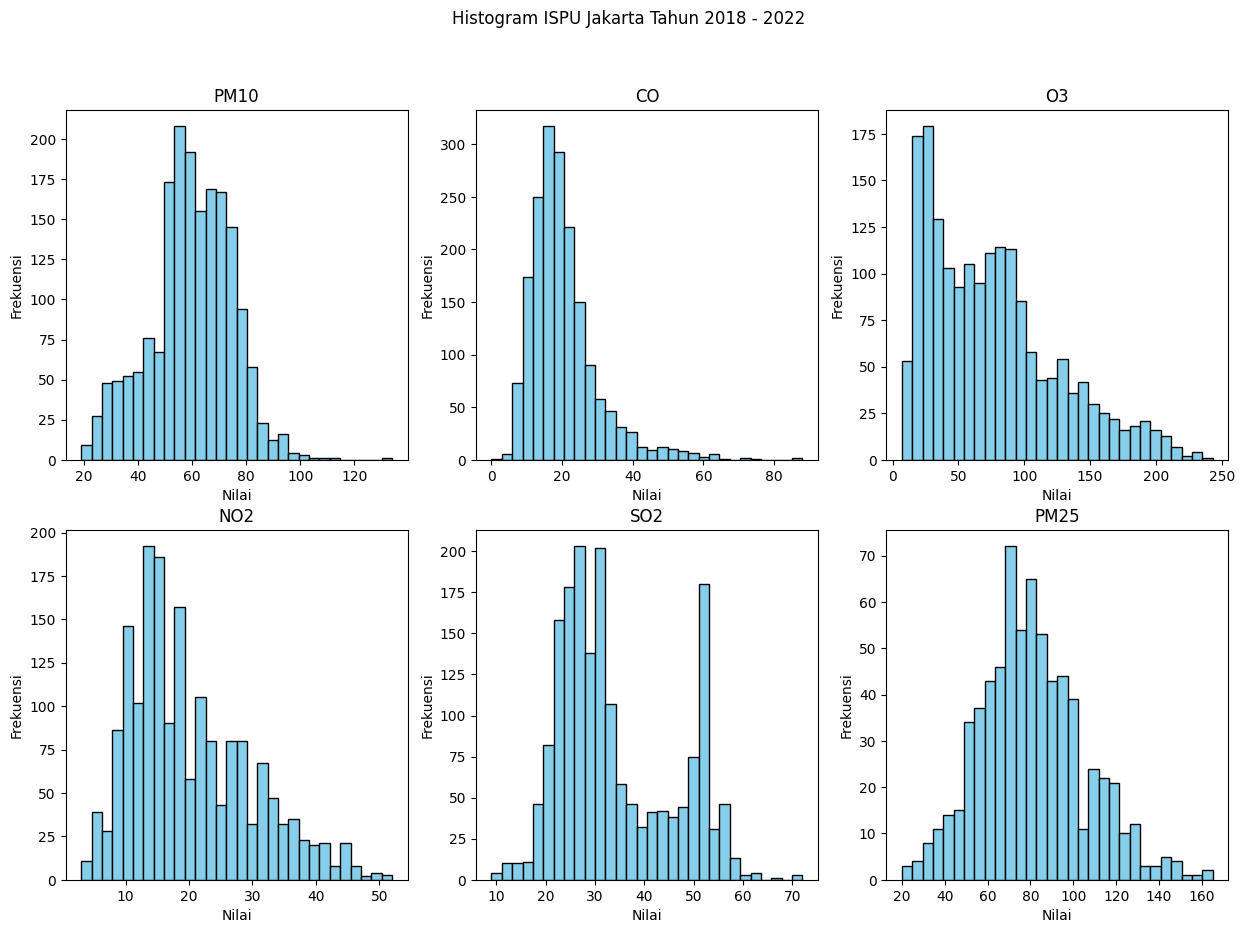

In [9]:
#Membuat histogram dengan matplotlib dalam subplot 2 baris 3 kolom yang berisi masing masing kolom dari ispu2, dan ispu4 untuk PM25
#Dengan label sumbu y sebagai frekuensi, dan label sumbu x sebagai nilai
#Dan juga judul masing masing subtotal adalah nama kolom yang sedang dikerjakan
#Inisialisasi grafik subplot
fig = plt.subplots(2,3,figsize=(15,10))

#Masuk ke kotak di kolom dan baris yang disebutkan
plt.subplot(2,3,1)
#Mengambil data yang akan ditampilkan, dalam kondisi ini PM10, dengan color skyblue dan warna pinggiran kotak sebagai hitam
plt.hist(ispu2['PM10'], bins=30, color='skyblue', edgecolor='black')
#Membuat judul dari grafik subplot ini 
plt.title('PM10')
#label sumbu y sebagai frekuensi
plt.ylabel('Frekuensi')
#label sumbu x sebagai nilai
plt.xlabel('Nilai')

plt.subplot(2,3,2)
plt.hist(ispu2['CO'], bins=30, color='skyblue', edgecolor='black')
plt.title('CO')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2,3,3)
plt.hist(ispu2['O3'], bins=30, color='skyblue', edgecolor='black')
plt.title('O3')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2,3,4)
plt.hist(ispu2['NO2'], bins=30, color='skyblue', edgecolor='black')
plt.title('NO2')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2,3,5)
plt.hist(ispu2['SO2'], bins=30, color='skyblue', edgecolor='black')
plt.title('SO2')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2,3,6)
plt.hist(ispu4['PM25'], bins=30, color='skyblue', edgecolor='black')
plt.title('PM25')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

#Menge-set judul garfik secara keseluruhan
plt.suptitle("Histogram ISPU Jakarta Tahun 2018 - 2022")

#Menampilkan grafik yang telah dibuat
plt.show()

Histogram

Merupakan suatu grafik yang menampilkan frekuensi data numerik menggunakan persegi panjang
Ketinggian dari persegi panjang tersebut adalah jumlah frekuensi dari variable tersebut 
Histogram digunakan dalam perangkuman data diskrit atau kontinu yang diukur pada skala interval
Histogram memiliki pola:
- unimodal / simetris
- Skewed right / miring ke kiri
- Skewed left / miring ke kanan
- Bimodal
- Multimodal
- Simetris

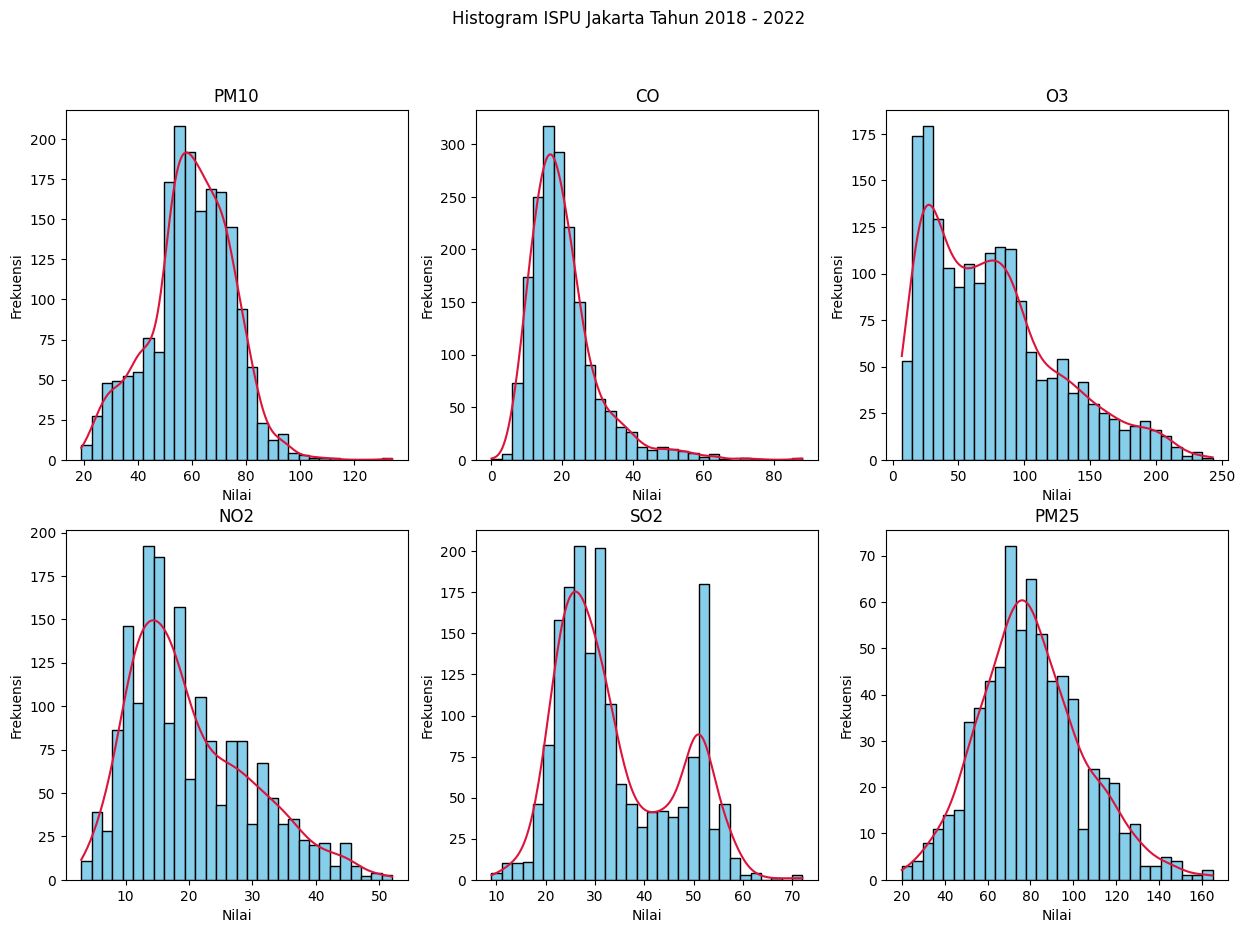

In [10]:
#Membuat histogram dengan library seaborn dan matplotlib akan masing masing frekuensi 
#Grafik kotak kotak histogram dari matplotlib dengan warna teal dan warna pinggiran kotak berupa biru tua
#Kemudian ditimpa dengan grafik garis histplot dari seaborn dengan warna merah
#Inisialisasi grafik subplot
fig = plt.subplots(2,3,figsize=(15,10))

#Masuk ke kotak di kolom dan baris yang disebutkan
plt.subplot(2,3,1)
#Membuat grafik garis pada kolom PM10 dengan seaborn
ax = sns.histplot(ispu2['PM10'], bins=30, kde=True, color='teal', edgecolor='darkblue')
#Membuat warna garisnya menjadi merah crimson
ax.lines[0].set_color('crimson')
#Membuat garfik kotak/histogram pada kolom PM10 dengan matplotlib
plt.hist(ispu2['PM10'], bins=30, color='skyblue', edgecolor='black')
#Membuat judul dari subplot ini sebagai PM10
plt.title('PM10')
#Membuat label sumbu y sebagai Frekuensi
plt.ylabel('Frekuensi')
#Membuat label sumbu x sebagai Nilai
plt.xlabel('Nilai')

plt.subplot(2,3,2)
ax = sns.histplot(ispu2['CO'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.hist(ispu2['CO'], bins=30, color='skyblue', edgecolor='black')
plt.title('CO')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2,3,3)
ax = sns.histplot(ispu2['O3'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.hist(ispu2['O3'], bins=30, color='skyblue', edgecolor='black')
plt.title('O3')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2,3,4)
ax = sns.histplot(ispu2['NO2'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.hist(ispu2['NO2'], bins=30, color='skyblue', edgecolor='black')
plt.title('NO2')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2,3,5)
ax = sns.histplot(ispu2['SO2'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.hist(ispu2['SO2'], bins=30, color='skyblue', edgecolor='black')
plt.title('SO2')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2,3,6)
ax = sns.histplot(ispu4['PM25'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.hist(ispu4['PM25'], bins=30, color='skyblue', edgecolor='black')
plt.title('PM25')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

#Membuat judul dari keseluruhan grafik
plt.suptitle("Histogram ISPU Jakarta Tahun 2018 - 2022")
#Menampilkan hasil grafik yang telah dibuat
plt.show()

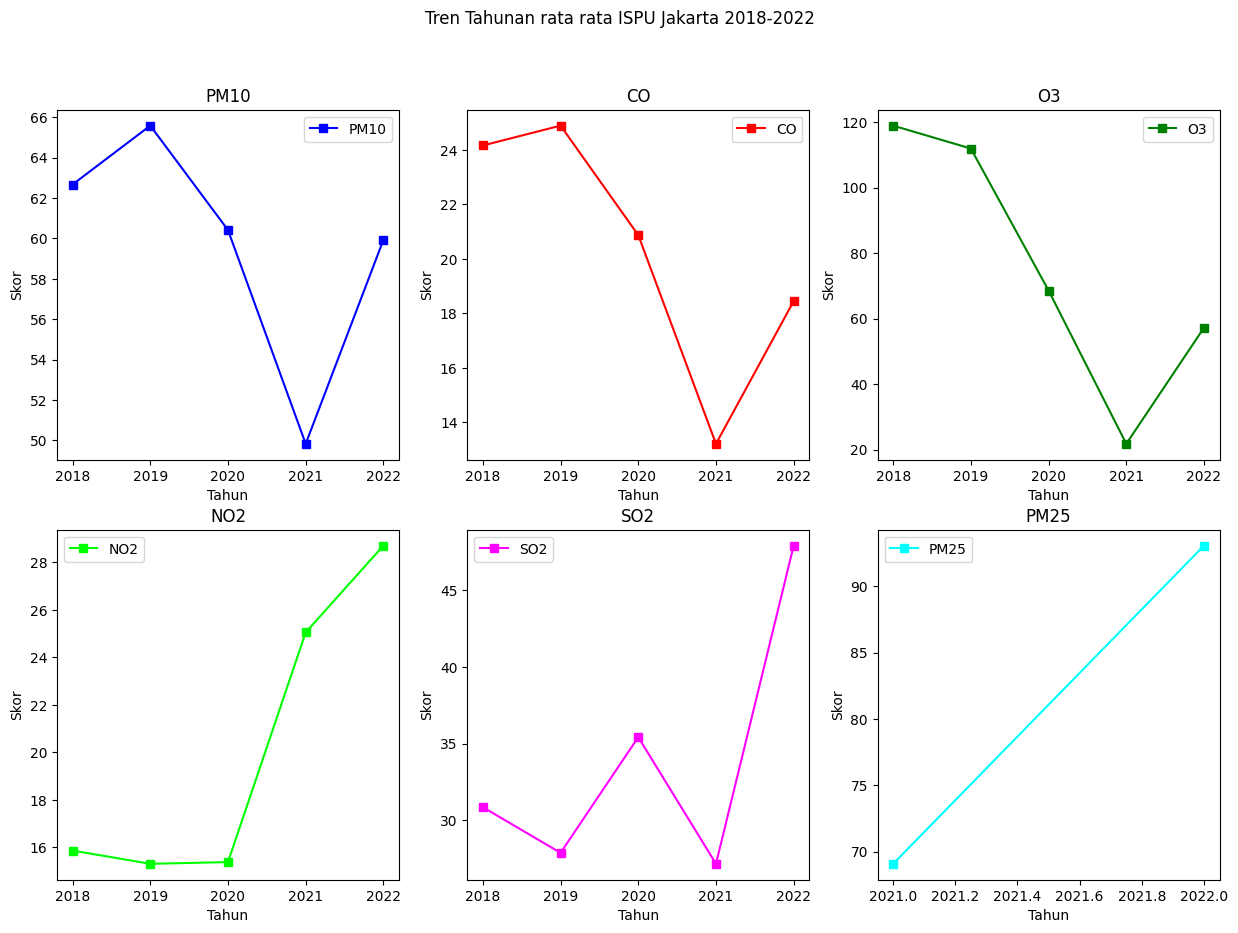

In [11]:
#Membuat grafik garis dengan matplotlib dari masing masing rata rata tiap kolom berdasarkan tahunnya
#Inisialisasi grafik subplot
fig = plt.subplots(2,3,figsize=(15,10))

#Masuk ke kotak di kolom dan baris yang disebutkan
plt.subplot(2,3,1)
#Memasukkan data rata rata PM10 yang telah di group by tahun, legend (keterangan) ditampilkan dan dengan warna biru
ispu2.groupby('Tahun')['PM10'].mean().plot(marker='s', legend=True, color='blue')
#Membuat judul dari subplot ini sebagai PM10
plt.title('PM10')
#Membuat label sumbu y sebagai Skor
plt.ylabel('Skor')
#Membuat label sumbu x sebagai Tahun
plt.xlabel('Tahun')

plt.subplot(2,3,2)
ispu2.groupby('Tahun')['CO'].mean().plot(marker='s', legend=True, color='red')
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,3)
ispu2.groupby('Tahun')['O3'].mean().plot(marker='s', legend=True, color='green')
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,4)
ispu2.groupby('Tahun')['NO2'].mean().plot(marker='s', legend=True, color='lime')
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,5)
ispu2.groupby('Tahun')['SO2'].mean().plot(marker='s', legend=True, color='magenta')
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,6)
ispu4.groupby('Tahun')['PM25'].mean().plot(marker='s', legend=True, color='aqua')
plt.title('PM25')
plt.ylabel('Skor')
plt.xlabel('Tahun')

#Membuat judul dari keseluruhan grafik
plt.suptitle("Tren Tahunan rata rata ISPU Jakarta 2018-2022")
#Menampilkan hasil grafik yang telah kita buat
plt.show()



Analisis grafik Tren Tahunan rata rata ISPU Jakarta 2018-2022 diatas:
- PM10 = Titik tertinggi berada di titik sedikit lebih rendah dari 66 di tahun 2019, dan titik terendah berada di titik sedikit lebih rendah dari 50 di tahun 2021
         Setelah kenaikan pada tahun 2018 ke 2019, Dari tahun 2019 sampai 2021, terjadi penurunan yang signifikan bertahap
         Dan kemudian kembali naik pada tahun 2021 ke 2022

- CO = Mirip dengan PM10, setelah kenaikan dari tahun 2018 sampai 2019, terjadi penurunan pada tahun 2019 sampai 2021, dan kembali naik pada     tahun 2021- 2022
       Titik tertinggi berada di titik sekitar 25 pada tahun 2019, dan titik terendah berada di titik sekitar 13 pada tahun 2021

- O3 = Titik tertinggi berada di titik sekitar 120 pada tahun 2018 dan titik terendah berada di titik seitar 20 pada tahun 2021
       Dari tahun 2018 sampai 2021 terjadi penurunan secara bertahap, yang kemudian naik lagi dari tahun 2021 ke 2022

- NO2 = Titik tertinggi berada di sekitar 29 pada tahun 2022, dan titik terendah berada di tahun 2019 di titik sekitar 15, walaupun beda hanya tipis dengan 2020
       Pada tahun 2018 sampai 2020 tidak banyak mendapatkan perubahan, kemudian naik dengan sangat signifikan dari 2020 sampai 2022

- SO2 = Titik tertinggi berada di titik sekitar 48 pada tahun 2022, dan titik terendah berada di titik sekitar 26 pada tahun 2021
       Data SO2 sepanjang tahun 2018-2022 berbentuk naik turun naik turun

- PM25 = Hanya memiliki 2 titik
         Titik tertinggi berada pada titik sekitar 94 pada tahun 2022, dan titik terendah berada di titik sekitar 69 pada tahun 2018
         Data PM25 sepanjang tahun berupa naik secara linear

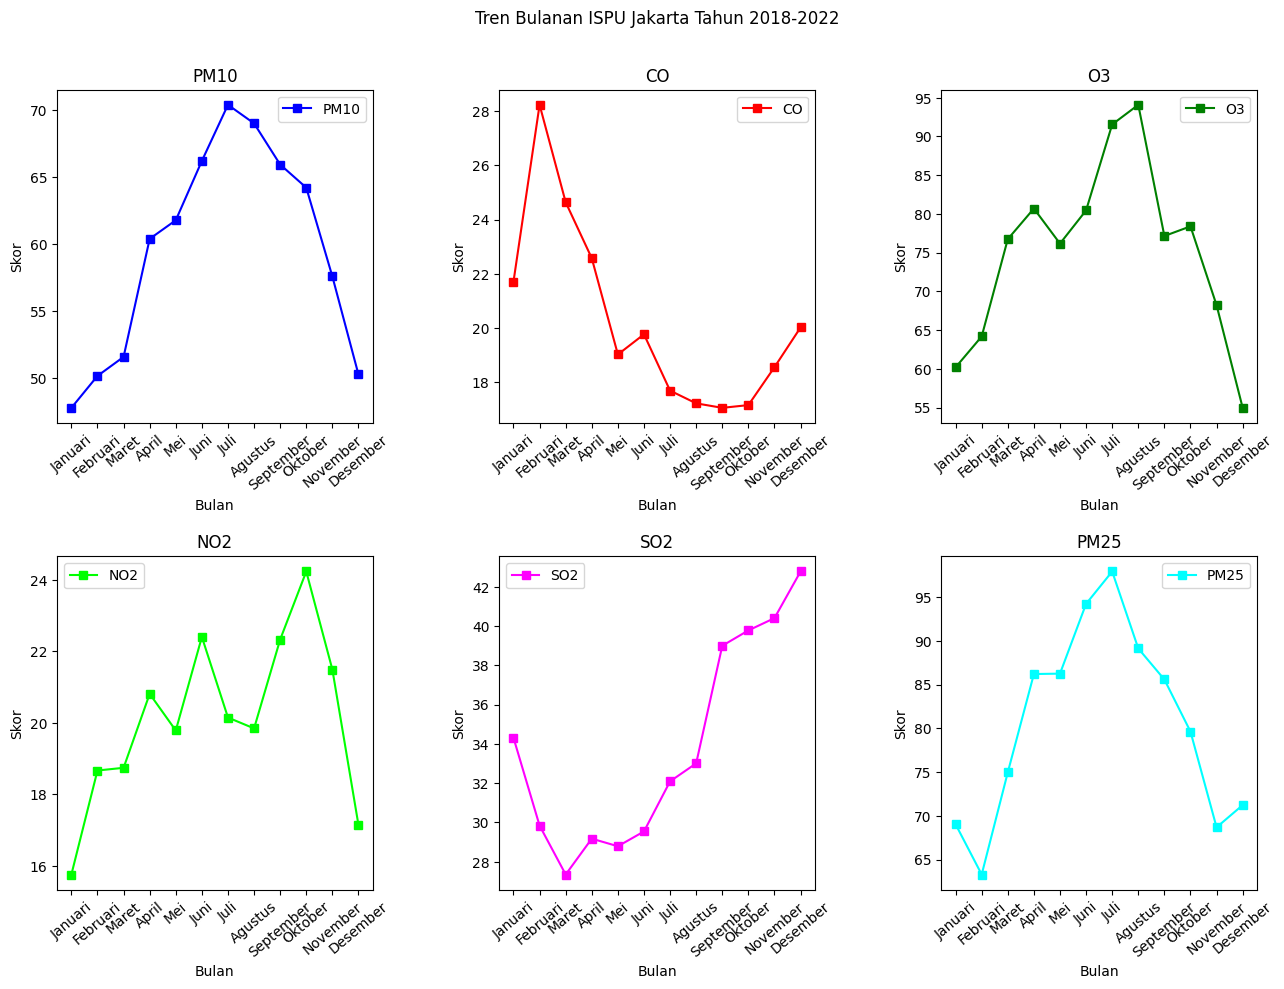

In [12]:
#Membuat grafik garis akan rata rata masing masing kolom berdasarkan masing masing bulan
#Inisialisasi grafik subplot
fig = plt.subplots(2,3,figsize=(15,10))
#Mengatur spacing antara masing masing kotak grafik subplot
plt.subplots_adjust(left=0.1, bottom=0.1,right=0.9, top=0.9, wspace=0.4, hspace=0.4)

#Masuk ke kotak di kolom dan baris yang disebutkan
plt.subplot(2,3,1)
#Memasukkan data rata rata dari kolom PM10 yang telah di group by oleh bulan, dengan marker kotak, dan legend (keterangan) yang ditampilkan dan dengan warna biru
ispu2.groupby('Bulan')['PM10'].mean().plot(marker='s', legend=True, color='blue')
#Mengganti nama dari masing masing bulan dari angka menjadi nama bulan
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=40)
#Membuat judul dari subplot grafik ini menjadi PM10
plt.title('PM10')
#Membuat label y menjadi skor
plt.ylabel('Skor')
#Membuat label x menjadi bulan
plt.xlabel('Bulan')

plt.subplot(2,3,2)
ispu2.groupby('Bulan')['CO'].mean().plot(marker='s', legend=True, color='red')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=40)
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2,3,3)
ispu2.groupby('Bulan')['O3'].mean().plot(marker='s', legend=True, color='green')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=40)
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2,3,4)
ispu2.groupby('Bulan')['NO2'].mean().plot(marker='s', legend=True, color='lime')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=40)
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2,3,5)
ispu2.groupby('Bulan')['SO2'].mean().plot(marker='s', legend=True, color='magenta')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=40)
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2,3,6)
ispu4.groupby('Bulan')['PM25'].mean().plot(marker='s', legend=True, color='aqua')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=40)
plt.title('PM25')
plt.ylabel('Skor')
plt.xlabel('Bulan')

#Membuat judul dari keseluruhan grafik
plt.suptitle("Tren Bulanan ISPU Jakarta Tahun 2018-2022")
#Menampilkan grafik yang telah dibuat
plt.show()


Analisis grafik Tren Bulanan ISPU Jakarta Tahun 2018-2022 diatas:
- PM10: nilai tertinggi berada di bulan Juli dengan titik diatas 70, dan nilai terendah berada di bawah 50 pada bulan Januari 
        Kenaikan terjadi pada Januari sampai Juli, dan penurunan terjadi pada Juli sampai Desember

- CO = nilai tertinggi berada di sekita 28 pada bulan Februari dan terendah pada titik 18 pada bulan Agustus
        Kenaikan terjadi pada Januari sampai Februari dan turun pada Februari sampai Mei

- O3 = nilai terendah terdapat pada titik sekitar 55 pada bulan Desember dan tertinggi pada bulan Agustus dengan titik sekitar 95
        terdapa pola kenailkan pada bulan januari sampai april dan mei sampai juli, kemudia penurunan dari agustus sampai september dan oktober ke desember

-NO2 = nilai tertinggi terdapat pada titik sekitar 24 pada bulan Oktober dan terendah pada titik sekitar 16 pada bulan Januari
        terdapat pola naik turun sepnajang januari sampai september

-SO2 = nilai tertinggi terdapat pada bulan Desember pada titik sekitar 42 dan terendah pada titik sekita 28 pada bulan Maret
        Terdapat penurunan dari bulan Januari sampai Maret, kemudian mengalami kenailkan dari maret sampai desember

- PM25 = nilai tertinggi terdapat pada titik sekitar 95 pada sekitar bulan Juli dan nilai terendah terdapat pada titik 65 pada bulan Februari
        terdapt kenaikan dari bulan Februari sampai Juli dan penurunan dari Juli sampai November


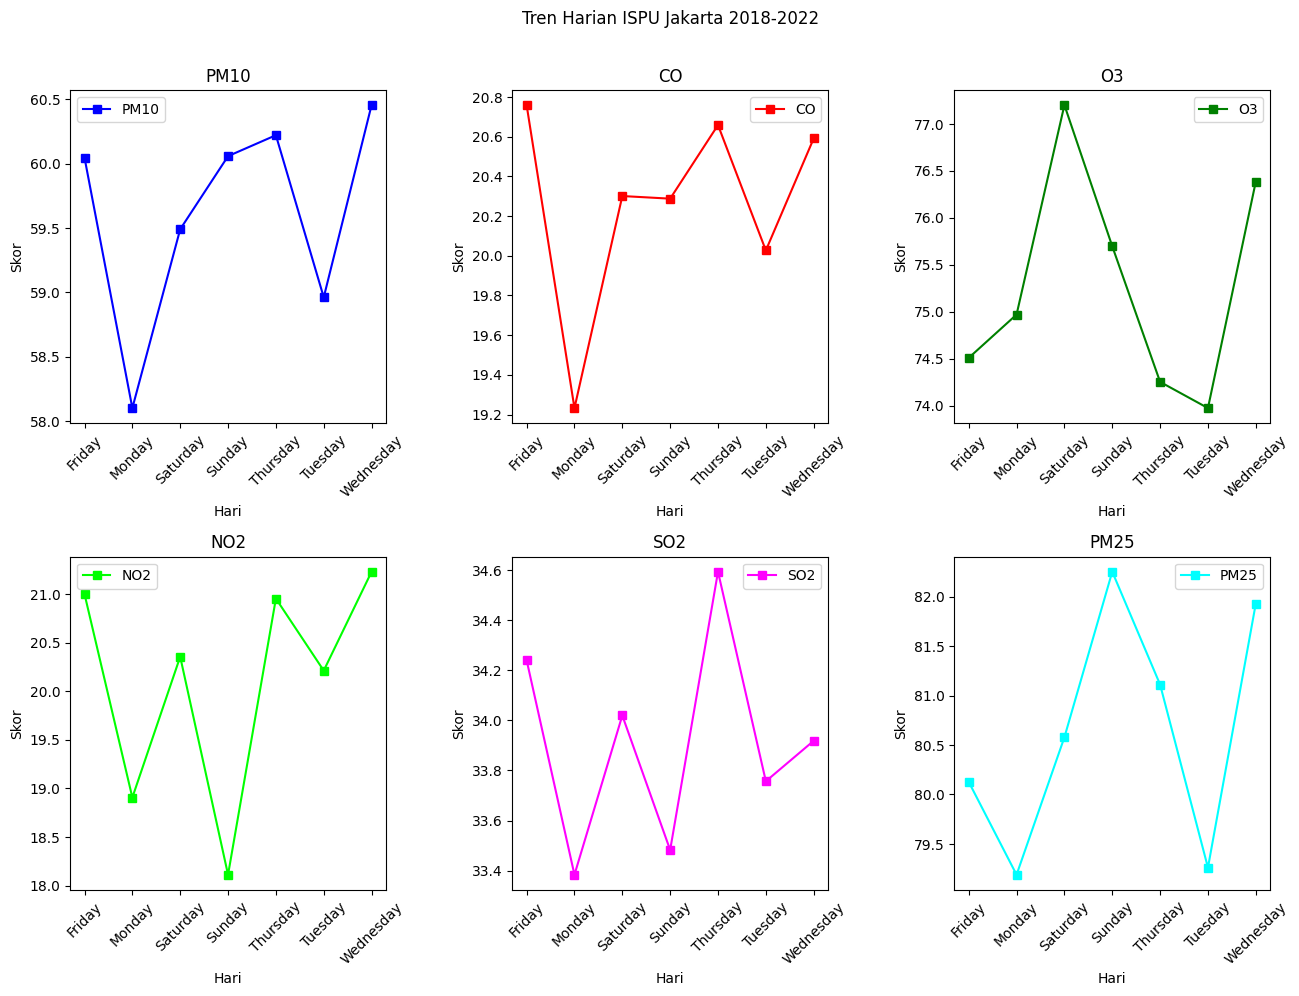

In [13]:
#Membuat grafik garis akan rata rata masing masing kolom berdasarkan masing masing hari
#Inisialisasi grafik subplot
fig = plt.subplots(2,3,figsize=(15,10))
#Mengatur spacing antara masing masing kotak grafik subplot
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

#Masuk ke kotak di kolom dan baris yang disebutkan
plt.subplot(2,3,1)
#Memasukkan data rata rata dari kolom PM10 yang telah di group by oleh hari, dengan marker kotak, dan legend (keterangan) yang ditampilkan dan dengan warna biru
ispu2.groupby('Hari')['PM10'].mean().plot(marker='s', legend=True, color='blue')
#Memutar label x sebanyak 45 derajat
plt.xticks(rotation=45)
#Membuat judul dari subplot grafik ini menjadi PM10
plt.title('PM10')
#Membuat label y menjadi skor
plt.ylabel('Skor')
#Membuat label x menjadi hari
plt.xlabel('Hari')

plt.subplot(2,3,2)
ispu2.groupby('Hari')['CO'].mean().plot(marker='s', legend=True, color='red')
plt.xticks(rotation=45)
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,3)
ispu2.groupby('Hari')['O3'].mean().plot(marker='s', legend=True, color='green')
plt.xticks(rotation=45)
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,4)
ispu2.groupby('Hari')['NO2'].mean().plot(marker='s', legend=True, color='lime')
plt.xticks(rotation=45)
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,5)
ispu2.groupby('Hari')['SO2'].mean().plot(marker='s', legend=True, color='magenta')
plt.xticks(rotation=45)
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,6)
ispu4.groupby('Hari')['PM25'].mean().plot(marker='s', legend=True, color='aqua')
plt.xticks(rotation=45)
plt.title('PM25')
plt.ylabel('Skor')
plt.xlabel('Hari')

#Membuat judul dari keseluruhan grafik
plt.suptitle("Tren Harian ISPU Jakarta 2018-2022")
#Menampilkan grafik yang telah dibuat
plt.show()

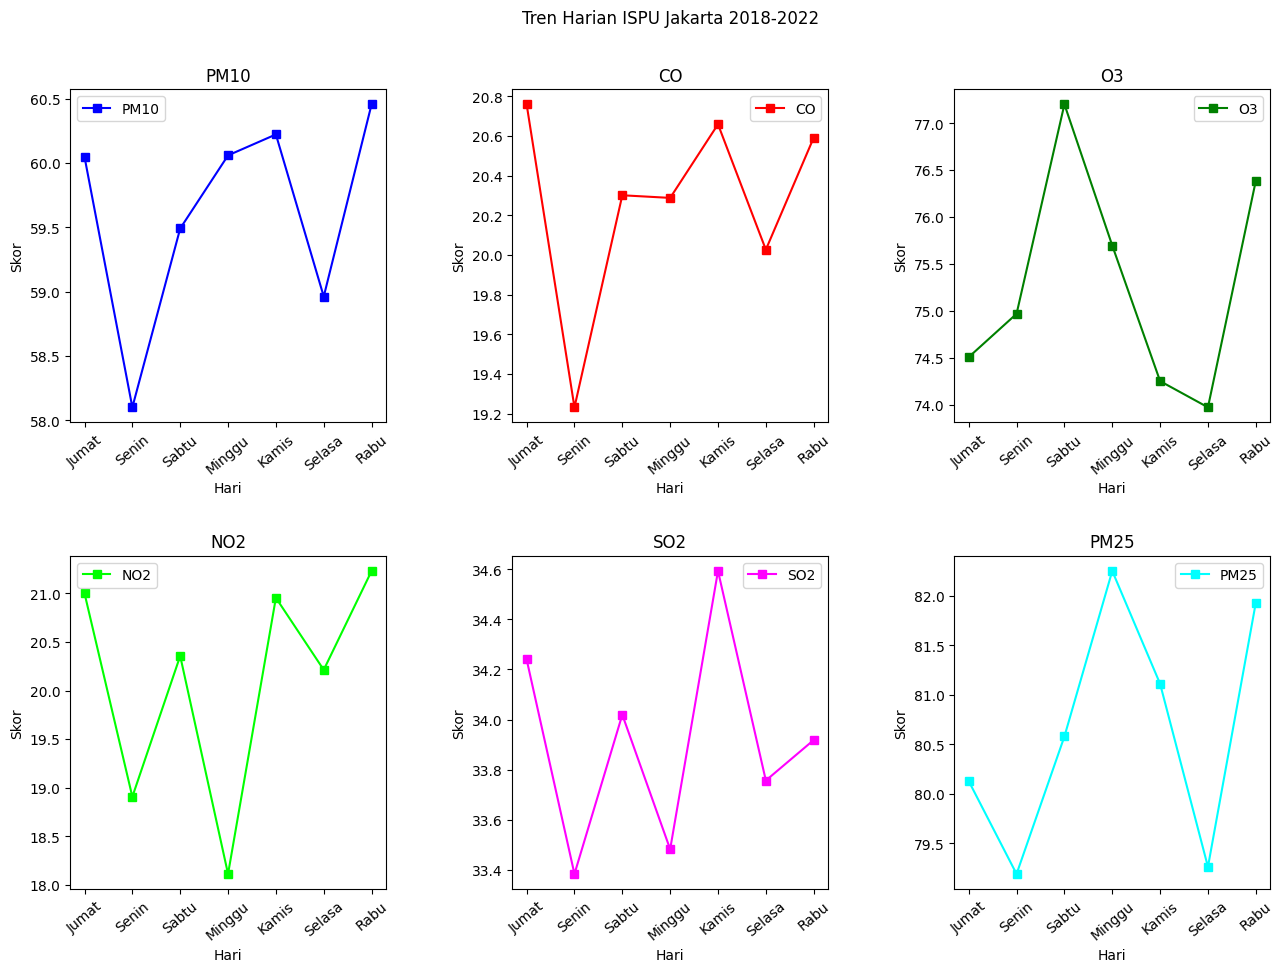

In [14]:
#Membuat grafik garis akan rata rata masing masing kolom berdasarkan masing masing hari dan ditampilkan dengan bahasa Indonesia
#Inisialisasi grafik subplot
fig = plt.subplots(2,3,figsize=(15,10))
#Mengatur spacing antara masing masing kotak grafik subplot
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

#Masuk ke kotak di kolom dan baris yang disebutkan
plt.subplot(2,3,1)
#Memasukkan data rata rata dari kolom PM10 yang telah di group by oleh hari, dengan marker kotak, dan legend (keterangan) yang ditampilkan dan dengan warna biru
ispu2.groupby('Hari')['PM10'].mean().plot(marker='s', legend=True, color='blue')
#Mengganti nama hari yang ada menjadi nama hari dalam bahasa Indonesia dan di rotasi sebanyak 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat','Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'],rotation=40) 
#Membuat judul dari subplot grafik ini menjadi PM10
plt.title('PM10')
#Membuat label y menjadi skor
plt.ylabel('Skor')
#Membuat label x menjadi hari
plt.xlabel('Hari')

plt.subplot(2,3,2)
ispu2.groupby('Hari')['CO'].mean().plot(marker='s', legend=True, color='red')
plt.xticks([0,1,2,3,4,5,6], ['Jumat','Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'],rotation=40)
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,3)
ispu2.groupby('Hari')['O3'].mean().plot(marker='s', legend=True, color='green')
plt.xticks([0,1,2,3,4,5,6], ['Jumat','Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'],rotation=40)
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,4)
ispu2.groupby('Hari')['NO2'].mean().plot(marker='s', legend=True, color='lime')
plt.xticks([0,1,2,3,4,5,6], ['Jumat','Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'],rotation=40)
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,5)
ispu2.groupby('Hari')['SO2'].mean().plot(marker='s', legend=True, color='magenta')
plt.xticks([0,1,2,3,4,5,6], ['Jumat','Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'],rotation=40)
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,6)
ispu4.groupby('Hari')['PM25'].mean().plot(marker='s', legend=True, color='aqua')
plt.xticks([0,1,2,3,4,5,6], ['Jumat','Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'],rotation=40)
plt.title('PM25')
plt.ylabel('Skor')
plt.xlabel('Hari')

#Membuat judul dari keseluruhan grafik
plt.suptitle("Tren Harian ISPU Jakarta 2018-2022")
#Menampilkan grafik yang telah dibuat
plt.show()

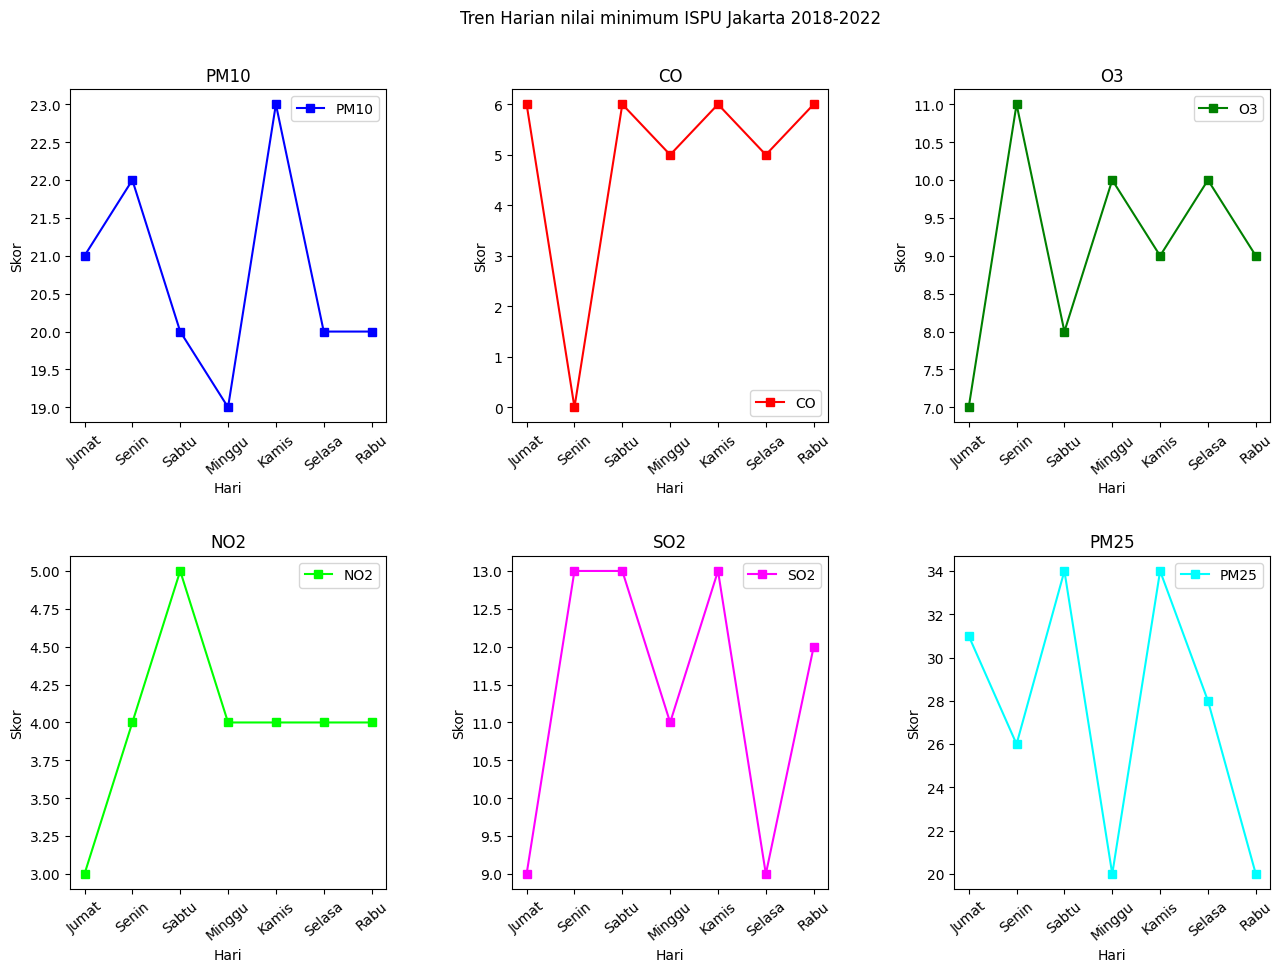

In [17]:
#Membuat grafik garis akan nilai minimum masing masing kolom berdasarkan masing masing hari dan ditampilkan dengan bahasa Indonesia
#Inisialisasi grafik subplot
fig = plt.subplots(2,3,figsize=(15,10))
#Mengatur spacing antara masing masing kotak grafik subplot
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

#Masuk ke kotak di kolom dan baris yang disebutkan
plt.subplot(2,3,1)
#Memasukkan data nilai minimum dari kolom PM10 yang telah di group by oleh hari, dengan marker kotak, dan legend (keterangan) yang ditampilkan dan dengan warna biru
ispu2.groupby('Hari')['PM10'].min().plot(marker='s', legend=True, color='blue')
#Mengganti nama hari yang ada menjadi nama hari dalam bahasa Indonesia dan di rotasi sebanyak 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat','Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'],rotation=40) 
#Membuat judul dari subplot grafik ini menjadi PM10
plt.title('PM10')
#Membuat label y menjadi skor
plt.ylabel('Skor')
#Membuat label x menjadi hari
plt.xlabel('Hari')


plt.subplot(2,3,2)
ispu2.groupby('Hari')['CO'].min().plot(marker='s', legend=True, color='red')
plt.xticks([0,1,2,3,4,5,6], ['Jumat','Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'],rotation=40)
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,3)
ispu2.groupby('Hari')['O3'].min().plot(marker='s', legend=True, color='green')
plt.xticks([0,1,2,3,4,5,6], ['Jumat','Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'],rotation=40)
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,4)
ispu2.groupby('Hari')['NO2'].min().plot(marker='s', legend=True, color='lime')
plt.xticks([0,1,2,3,4,5,6], ['Jumat','Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'],rotation=40)
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,5)
ispu2.groupby('Hari')['SO2'].min().plot(marker='s', legend=True, color='magenta')
plt.xticks([0,1,2,3,4,5,6], ['Jumat','Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'],rotation=40)
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,6)
ispu4.groupby('Hari')['PM25'].min().plot(marker='s', legend=True, color='aqua')
plt.xticks([0,1,2,3,4,5,6], ['Jumat','Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'],rotation=40)
plt.title('PM25')
plt.ylabel('Skor')
plt.xlabel('Hari')

#Membuat judul dari keseluruhan grafik
plt.suptitle("Tren Harian nilai minimum ISPU Jakarta 2018-2022")
#Menampilkan grafik yang telah dibuat
plt.show()

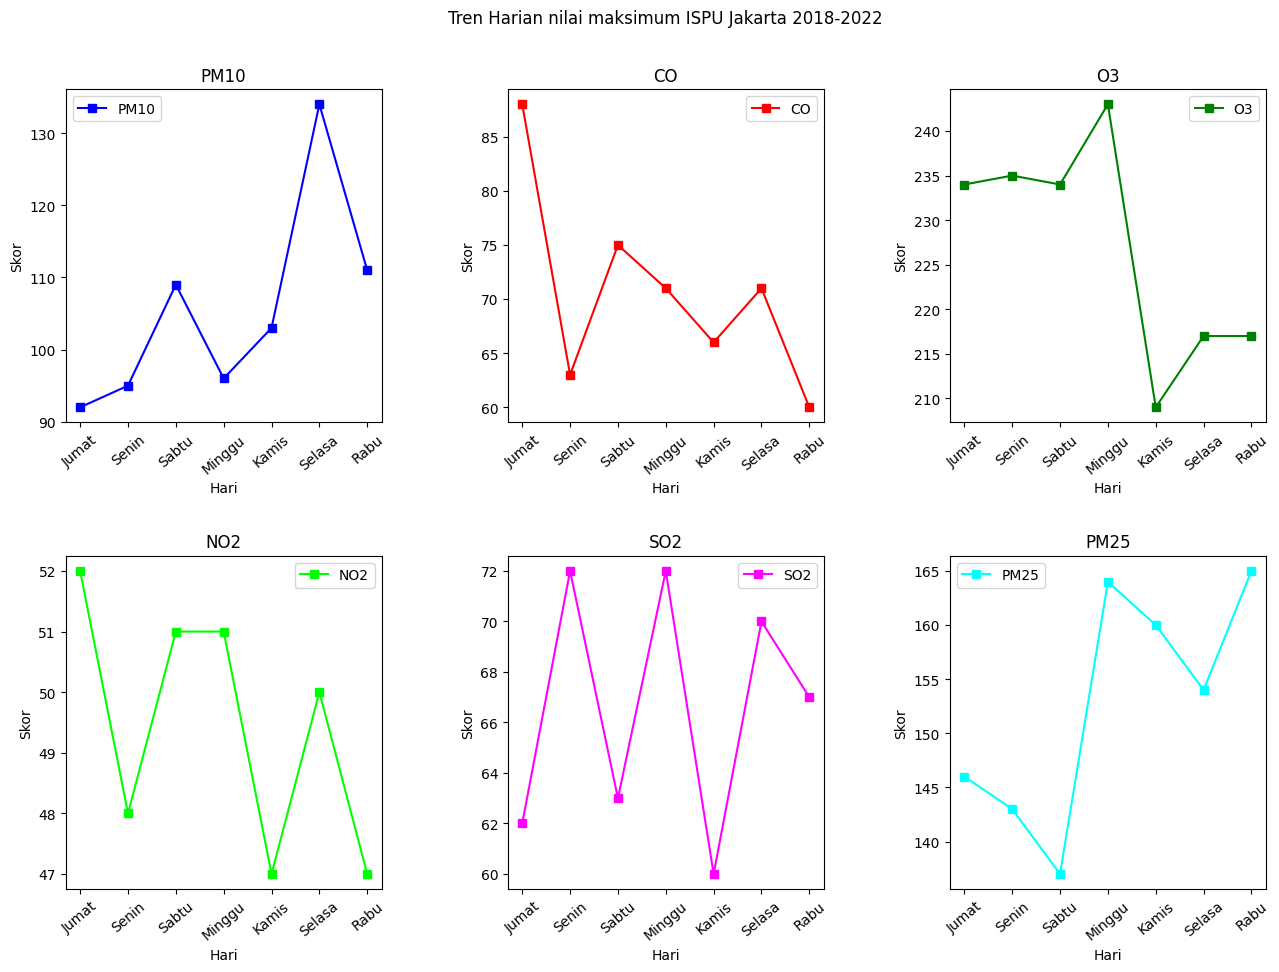

In [16]:
#Membuat grafik garis akan nilai minimum masing masing kolom berdasarkan masing masing hari dan ditampilkan dengan bahasa Indonesia
#Inisialisasi grafik subplot
fig = plt.subplots(2,3,figsize=(15,10))
#Mengatur spacing antara masing masing kotak grafik subplot
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

#Masuk ke kotak di kolom dan baris yang disebutkan
plt.subplot(2,3,1)
#Memasukkan data nilai maksimum dari kolom PM10 yang telah di group by oleh hari, dengan marker kotak, dan legend (keterangan) yang ditampilkan dan dengan warna biru
ispu2.groupby('Hari')['PM10'].max().plot(marker='s', legend=True, color='blue')
#Mengganti nama hari yang ada menjadi nama hari dalam bahasa Indonesia dan di rotasi sebanyak 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat','Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'],rotation=40) 
#Membuat judul dari subplot grafik ini menjadi PM10
plt.title('PM10')
#Membuat label y menjadi skor
plt.ylabel('Skor')
#Membuat label x menjadi hari
plt.xlabel('Hari')

plt.subplot(2,3,2)
ispu2.groupby('Hari')['CO'].max().plot(marker='s', legend=True, color='red')
plt.xticks([0,1,2,3,4,5,6], ['Jumat','Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'],rotation=40)
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,3)
ispu2.groupby('Hari')['O3'].max().plot(marker='s', legend=True, color='green')
plt.xticks([0,1,2,3,4,5,6], ['Jumat','Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'],rotation=40)
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,4)
ispu2.groupby('Hari')['NO2'].max().plot(marker='s', legend=True, color='lime')
plt.xticks([0,1,2,3,4,5,6], ['Jumat','Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'],rotation=40)
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,5)
ispu2.groupby('Hari')['SO2'].max().plot(marker='s', legend=True, color='magenta')
plt.xticks([0,1,2,3,4,5,6], ['Jumat','Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'],rotation=40)
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2,3,6)
ispu4.groupby('Hari')['PM25'].max().plot(marker='s', legend=True, color='aqua')
plt.xticks([0,1,2,3,4,5,6], ['Jumat','Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'],rotation=40)
plt.title('PM25')
plt.ylabel('Skor')
plt.xlabel('Hari')

#Membuat judul dari keseluruhan grafik
plt.suptitle("Tren Harian nilai maksimum ISPU Jakarta 2018-2022")
#Menampilkan grafik yang telah dibuat
plt.show()

Pada 2 grafik diatas,
- PM10 = nilai maksimum terdapat pada hari Selasa dan nilai minimum terdapat pada hari Minggu
- CO = nilai maksimum terdapat pada hari Jumat dan nilai minimum terdapat pada hari Senin
- O3 = nilai maksimum terdapat pada hari Minggu dan nilai minimum terdapat pada hari Jumat
- NO2 = nilai maksimum terdapat pada hari Jumat dan nilai minimum terdapat pada hari Jumat
- SO2 = nilai maksimum terdapat pada hari Senin dan Minggu dan nilai minimum terdapat pada hari Jumat dan Selasa
- PM25 = nilai maksimum terdapat pada hari Rabu dan nilai minimum terdapat pada hari Minggu dan Rabu